In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from BanditRec.settings import NewsSimulationSetting, NewsSimulationSetting2
from BanditRec.setting import SettingConfig
from BanditRec.agents import RandomAgent, EpsGreedyAgent, ThompsonAgent, FroomleAgent
from BanditRec.simulator import Simulator

# Settings

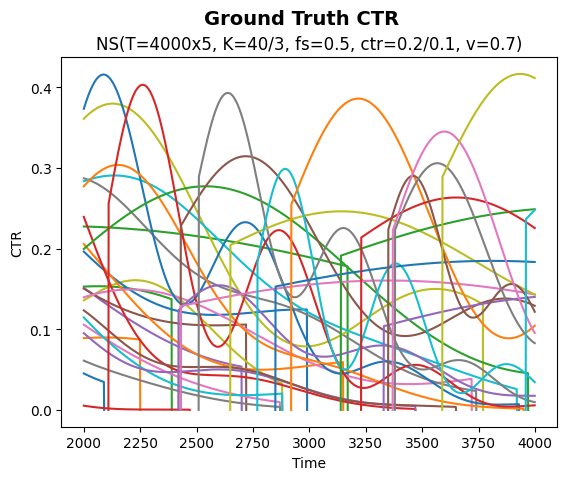

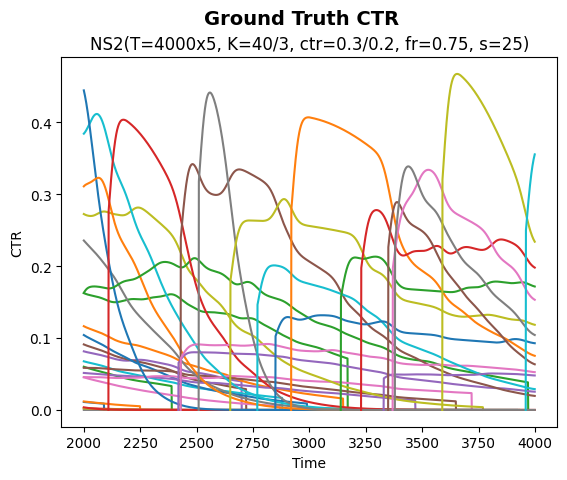

In [15]:
s1 = NewsSimulationSetting(
    SettingConfig(4000, 40, 3, 5),
    lifetime=2000,
    falloff_speed=0.5, 
    ctr_base=0.2,
    ctr_fuzz=0.1
)
s2 = NewsSimulationSetting2(
    SettingConfig(4000, 40, 3, 5),
    lifetime=2000,
    smoothing=25,
    falloff_rate=0.75,
    ctr_base=0.3,
    ctr_fuzz=0.2
)
s1.visualize(tmin=2000)
s2.visualize(tmin=2000)

# Multi-seed Simulation

In [5]:
sim = Simulator(run_count=100, seed_change_interval=5)

In [6]:
sim.set_setting(s1)
sim.run_oracle()

sim.run_agent(ThompsonAgent, {})
for ws in [100, 500, 1000, 3000]:
    sim.run_agent(ThompsonAgent, {'ws': ws})

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [7]:
sim.set_setting(s2)
sim.run_oracle()

sim.run_agent(ThompsonAgent, {})
for ws in [100, 500, 1000, 3000]:
    sim.run_agent(ThompsonAgent, {'ws': ws})

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 NS(T=4000x5, K=40/3, fs=0.5, ctr=0.2/0.1, v=0.7) 
    1154.6 ±25.2       - SW-TS(ws=3000)
    1531.9 ±68.2       - TS()
    1951.8 ±33.9       - SW-TS(ws=1000)
    2721.1 ±47.5       - SW-TS(ws=500)
    4467.2 ±77.4       - SW-TS(ws=100)

 NS2(T=4000x5, K=40/3, ctr=0.3/0.2, fr=0.75, s=25) 
     977.3 ±20.0       - SW-TS(ws=3000)
    1675.6 ±57.0       - TS()
    1738.4 ±32.3       - SW-TS(ws=1000)
    2617.9 ±50.7       - SW-TS(ws=500)
    5464.6 ±97.3       - SW-TS(ws=100)



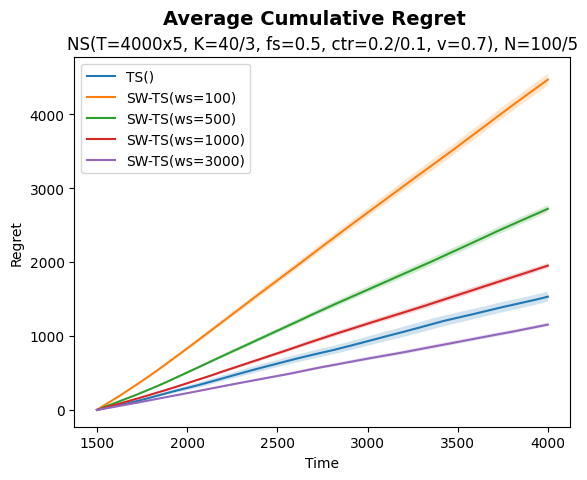

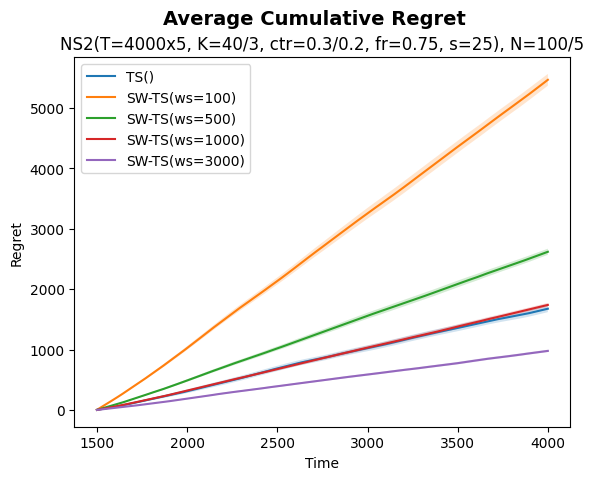

In [16]:
sim.results.rank(tmin=1500)
sim.results.create_regret_plot(tmin=1500)

# Single-seed simulation

In [9]:
sim2 = Simulator(run_count=100, seed_change_interval=0)

In [10]:
sim2.set_setting(s1)
sim2.run_oracle()

sim2.run_agent(ThompsonAgent, {})
for ws in [100, 500, 1000, 3000]:
    sim2.run_agent(ThompsonAgent, {'ws': ws})

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [11]:
sim2.set_setting(s2)
sim2.run_oracle()

sim2.run_agent(ThompsonAgent, {})
for ws in [100, 500, 1000, 3000]:
    sim2.run_agent(ThompsonAgent, {'ws': ws})

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

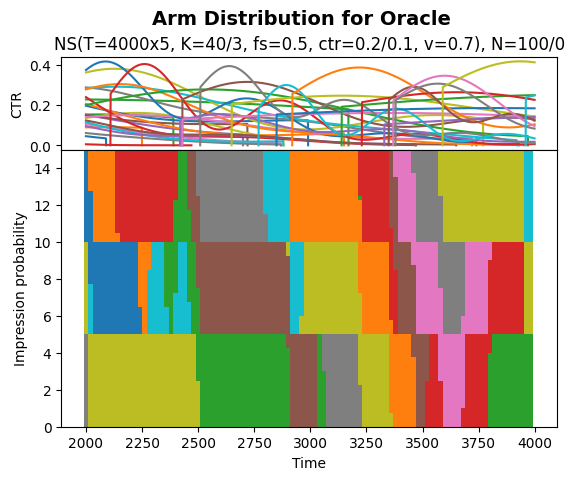

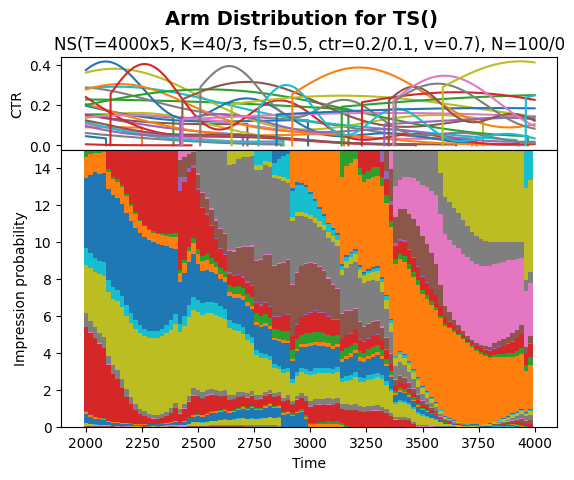

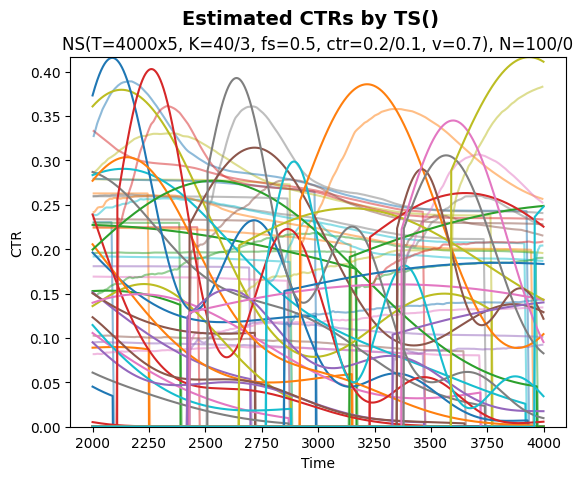

In [12]:
sim2.results.create_impressions_plot(setting=s1.label, agent='Oracle', tmin=2000)
sim2.results.create_impressions_plot(setting=s1.label, agent='TS()', tmin=2000)
sim2.results.create_estimates_plot(setting=s1.label, agent='TS()', tmin=2000)

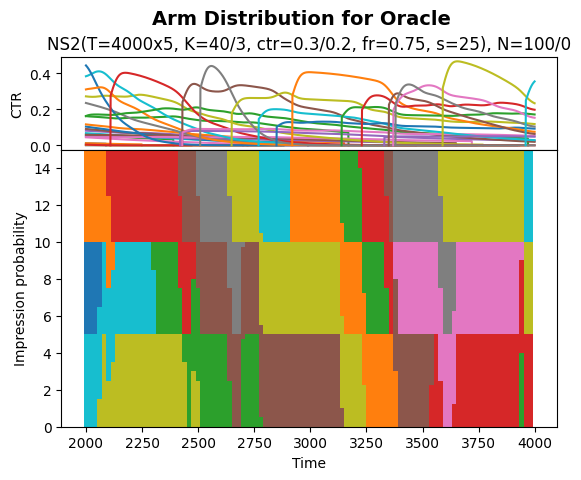

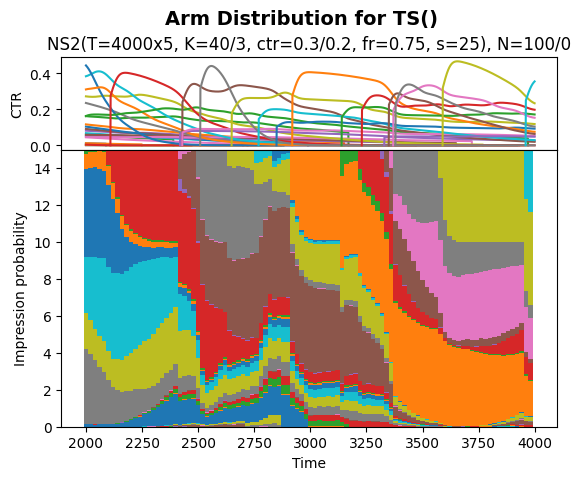

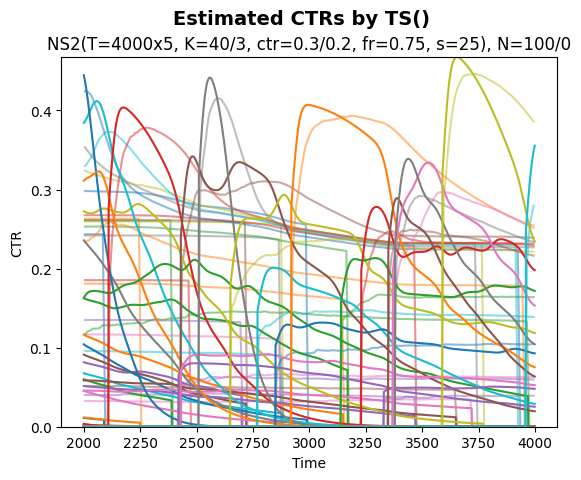

In [13]:
sim2.results.create_impressions_plot(setting=s2.label, agent='Oracle', tmin=2000)
sim2.results.create_impressions_plot(setting=s2.label, agent='TS()', tmin=2000)
sim2.results.create_estimates_plot(setting=s2.label, agent='TS()', tmin=2000)